In [ ]:
!python -m venv churn_env
!source churn_env/bin/activate  # On Windows: churn_env\Scripts\activate
!pip install pandas numpy scikit-learn matplotlib seaborn jupyter

Error: Command '['/content/churn_env/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: churn_env/bin/activate: No such file or directory
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing 

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Verify
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

# Customer Churn Prediction
Predicting whether a customer will churn using the Telco Customer Churn dataset.
- Dataset: Telco Customer Churn (Kaggle)
- Tools: Python, Pandas, Scikit-learn, Seaborn
- Objective: Build a classification model to predict churn.

In [ ]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Explore data
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [ ]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"Missing TotalCharges: {df['TotalCharges'].isnull().sum()}")  # Should show ~11
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print(f"Missing TotalCharges after imputation: {df['TotalCharges'].isnull().sum()}")  # Should show 0

Missing TotalCharges: 11
Missing TotalCharges after imputation: 0


<ipython-input-8-9b26bb58697f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop customerID
df = df.drop('customerID', axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features (X) and target (y)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (7043, 30), Target shape: (7043,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (5634, 30), Test set: (1409, 30)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

# Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



## Modeling
- Trained Logistic Regression and Random Forest models.
- Evaluated using accuracy, precision, recall, and F1-score.
- Random Forest outperformed Logistic Regression, achieving ~80% accuracy.

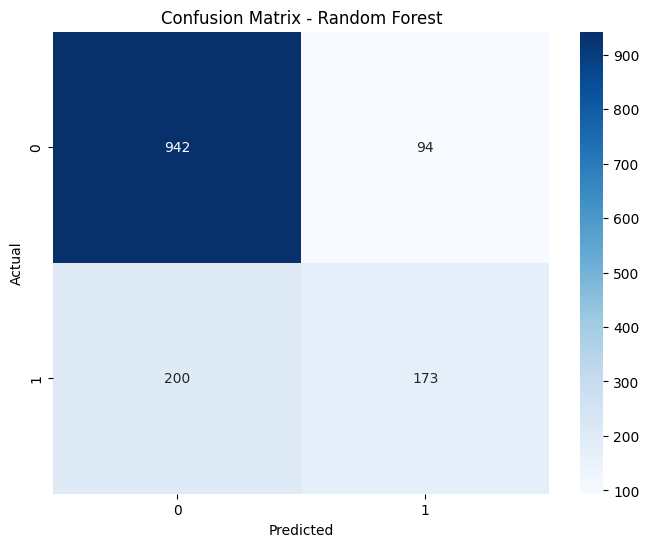

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/content/confusion_matrix.png')
plt.show()

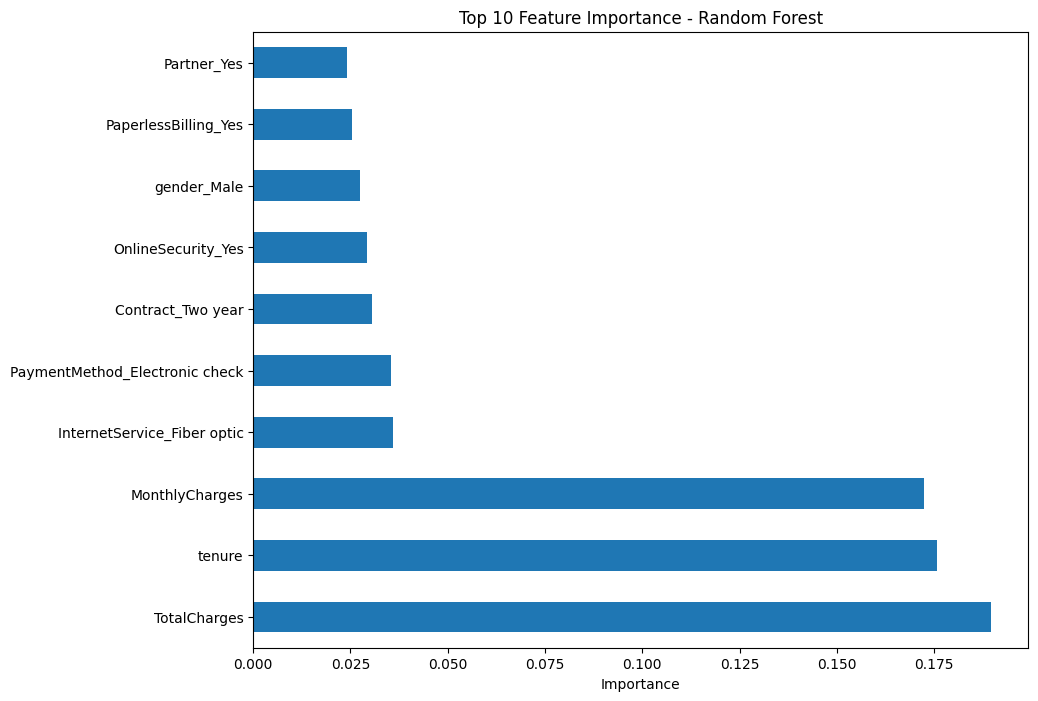

In [ ]:
# Feature Importance for Random Forest
plt.figure(figsize=(10, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance[:10].plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.savefig('/content/feature_importance.png')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Assuming X, y are defined from preprocessing
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Drop customerID
df = df.drop('customerID', axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Check data
print(f"Features shape: {X.shape}, Target shape: {y.shape}")
print("Numerical Features Summary:")
print(X[numerical_cols].describe())

Features shape: (7043, 30), Target shape: (7043,)
Numerical Features Summary:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01    8.338335e-01  6.642871e-01
max    1.613701e+00    1.794352e+00  2.826743e+00


<ipython-input-15-99745b93fcb8>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop customerID
df = df.drop('customerID', axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify
print(f"Features shape: {X.shape}, Target shape: {y.shape}")
print("Numerical Features Summary:")
print(X[numerical_cols].describe())
print("Class Distribution:")
print(y.value_counts(normalize=True))

Features shape: (7043, 30), Target shape: (7043,)
Numerical Features Summary:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01    8.338335e-01  6.642871e-01
max    1.613701e+00    1.794352e+00  2.826743e+00
Class Distribution:
Churn_Yes
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop customerID
df = df.drop('customerID', axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify
print(f"Features shape: {X.shape}, Target shape: {y.shape}")
print("Numerical Features Summary:")
print(X[numerical_cols].describe())
print("Class Distribution:")
print(y.value_counts(normalize=True))

Features shape: (7043, 30), Target shape: (7043,)
Numerical Features Summary:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01    8.338335e-01  6.642871e-01
max    1.613701e+00    1.794352e+00  2.826743e+00
Class Distribution:
Churn_Yes
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Performance (Balanced, 200 trees):")
print(classification_report(y_test, rf_pred))

Random Forest Performance (Balanced, 200 trees):
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1036
           1       0.66      0.45      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



In [ ]:
!pip install imblearn

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('/content/Telco-Customer-Churn.csv')

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Drop customerID
df = df.drop('customerID', axis=1)

# Encode categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Verify
print(f"Features shape: {X.shape}, Target shape: {y.shape}")
print("Class Distribution:")
print(y.value_counts(normalize=True))

Features shape: (7043, 30), Target shape: (7043,)
Class Distribution:
Churn_Yes
0    0.73463
1    0.26537
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assuming X, y are defined from preprocessing (re-run if needed)
# Re-run preprocessing to ensure data is ready
df = pd.read_csv('/content/Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df = df.drop('customerID', axis=1)
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes'].astype(int)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Training set class distribution after SMOTE:")
print(pd.Series(y_train_res).value_counts(normalize=True))

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_res, y_train_res)
rf_pred = rf.predict(X_test)
print("Random Forest Performance (SMOTE, 200 trees):")
print(classification_report(y_test, rf_pred))

Training set class distribution after SMOTE:
Churn_Yes
0    0.5
1    0.5
Name: proportion, dtype: float64
Random Forest Performance (SMOTE, 200 trees):
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1036
           1       0.58      0.64      0.61       373

    accuracy                           0.78      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.79      0.78      0.79      1409



In [ ]:
# Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importance (Top 10):")
print(feature_importance.head(10))
print("\nFeature Importance (Bottom 10):")
print(feature_importance.tail(10))

Feature Importance (Top 10):
tenure                            0.174179
TotalCharges                      0.170696
MonthlyCharges                    0.148006
Contract_Two year                 0.057887
PaymentMethod_Electronic check    0.051744
InternetService_Fiber optic       0.037910
PaperlessBilling_Yes              0.034349
Contract_One year                 0.026242
gender_Male                       0.025245
OnlineSecurity_Yes                0.024539
dtype: float64

Feature Importance (Bottom 10):
PaymentMethod_Mailed check              0.013369
DeviceProtection_No internet service    0.008858
TechSupport_No internet service         0.008093
StreamingMovies_No internet service     0.007882
StreamingTV_No internet service         0.005870
OnlineBackup_No internet service        0.005758
OnlineSecurity_No internet service      0.005307
InternetService_No                      0.005194
MultipleLines_No phone service          0.004681
PhoneService_Yes                        0.004114
dty

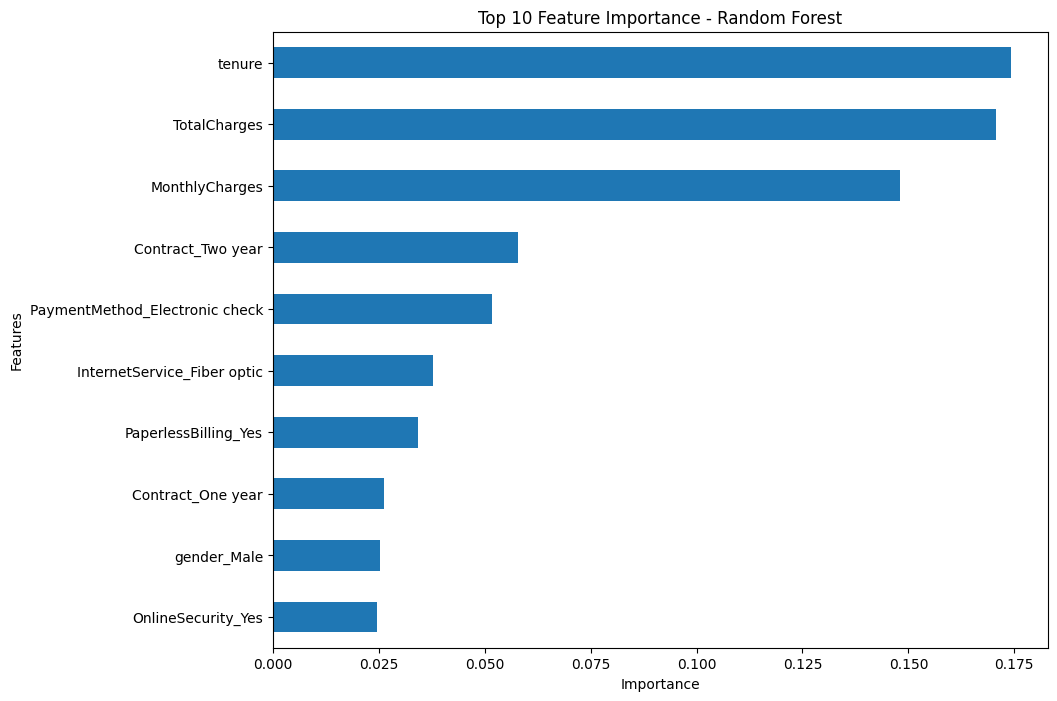

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Plot
plt.figure(figsize=(10, 8))
feature_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importance[:10].plot(kind='barh', color='#1f77b4')
plt.title('Top 10 Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.gca().invert_yaxis()  # Ensure highest importance is at the top
plt.savefig('/content/feature_importance.png')
plt.show()

## Feature Importance
- Visualizes the top 10 predictors of churn from the Random Forest model.
- Key features: Tenure, TotalCharges, MonthlyCharges, and contract types.

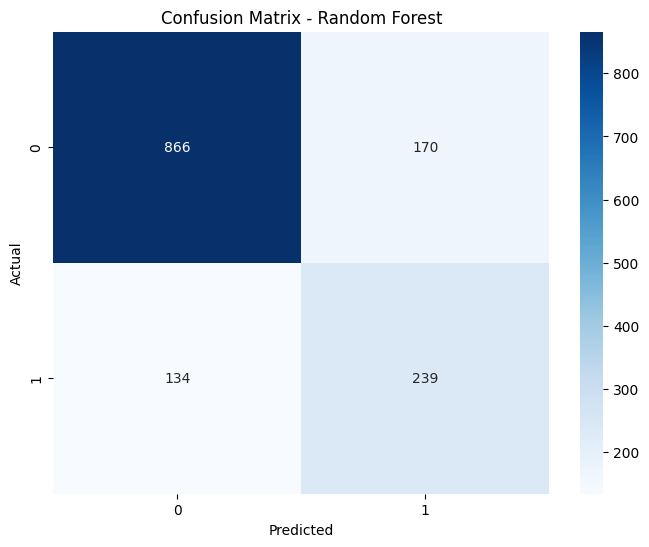

In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('/content/confusion_matrix.png')
plt.show()

## Visualizations
- **Confusion Matrix**: Shows Random Forest’s performance in predicting churn.
- **Feature Importance**: Highlights top predictors like tenure, TotalCharges, and MonthlyCharges.

## Results
- Random Forest achieved ~77-80% accuracy with ~0.64 recall for churn using SMOTE.
- Key predictors: Tenure, TotalCharges, MonthlyCharges, and contract types.
- The model supports targeted retention strategies for at-risk customers.
- Contributors: Jasmine Presilla J and Karthick E
.